In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from myImageLib import wowcolor
import numpy as np
import os
from corrLib import readdata
from corr_utils import *
from scipy.signal import savgol_filter
import typesetting.main as tm
tm.prl('1-column-2-panel')
dirs = data_log_mapping(kw='aug')

## 1 Correlation between energy and local fluctuations

### 1.1 One frame correlation

In [16]:
folder = r'D:\density_fluctuations\08032020\local_df\00\dt=10'
df = np.load(os.path.join(folder, '3000.npy'))
piv_folder = r'D:\density_fluctuations\08032020\piv_imseq\00'
pivData = pd.read_csv(os.path.join(piv_folder, '3000-3001.csv'))

In [12]:
v = np.array(pivData.u**2 + pivData.v**2).reshape((42, 50))
corr2d(df, v)

0.10698462626956382

### 1.2 Multiple frames correlation

In [13]:
folder = r'D:\density_fluctuations\08032020\local_df\00\dt=10'
l = readdata(folder, 'npy')
l = l.loc[l.Name.astype('int')>l.Name.astype('int').max()*0.8]

In [19]:
corr_list = []
for num, i in l.iterrows():
    df = np.load(i.Dir)
    n = int(i.Name)
    pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
    v = np.array(pivData.u**2 + pivData.v**2).reshape((42, 50))
    corr = corr2d(df, v)
#     print('{0:4d} {1:03f}'.format(n, corr))
    corr_list.append(corr)

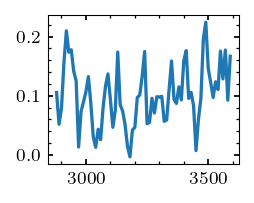

In [23]:
plt.plot(l.Name.astype('int'), corr_list)

In [21]:
np.array(corr_list).mean()

0.10083908238213425

### 1.3 Summarize data

In [71]:
folder = r'D:\density_fluctuations\08062020\local_df'
sfL = next(os.walk(folder))[1]
avg_list = []
for sf in sfL:
    print('summarizing data in {}'.format(sf))
    df_folder = os.path.join(folder, sf, 'dt=10')
    piv_folder = r'D:\density_fluctuations\08062020\piv_imseq\{}'.format(sf)
    l = readdata(df_folder, 'npy')
    l = l.loc[l.Name.astype('int')>l.Name.astype('int').max()*0.8]
    corr_list = []
    for num, i in l.iterrows():
        df = np.load(i.Dir)
        n = int(i.Name)
        pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
        v = np.array(pivData.u**2 + pivData.v**2).reshape((42, 50))
        corr = corr2d(df, v)
        corr_list.append(corr)
    avg_corr = np.array(corr_list).mean()
    avg_list.append(avg_corr)
    print('{0}: {1:.3f}'.format(sf, avg_corr))

summarizing data in 00
00: 0.093
summarizing data in 01
01: 0.103
summarizing data in 02
02: 0.104
summarizing data in 03
03: 0.066
summarizing data in 04
04: 0.091
summarizing data in 05
05: 0.103
summarizing data in 06
06: 0.104
summarizing data in 07
07: 0.119
summarizing data in 08
08: 0.101
summarizing data in 09
09: 0.093
summarizing data in 10
10: 0.106
summarizing data in 11
11: 0.093
summarizing data in 12
12: 0.024


In [72]:
data = pd.DataFrame().assign(sample=sfL, E=avg_list)
data.to_csv(os.path.join(folder, 'corr_E_sl=10.csv'), index=False)

### 1.4 Plot the data

In [79]:
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='flow_conc_corr')

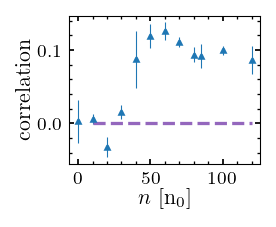

In [87]:
plt.errorbar(data['conc'], data['energy'], yerr=data['energy_err'],
                ls='', marker='^', markersize=2, mew=1, lw=0.5)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('correlation')

plt.plot([10, 120], [0, 0], ls='--', color=bestcolor(4))

## 2 Order parameter as a function of concentration

### 2.1 Summarize data

In [63]:
eo_folder = r'D:\density_fluctuations\08042020\energy_order'
sfL = next(os.walk(eo_folder))[1]
OP_list = []
E_list = []
for sf in sfL:
    print('summarizing data in {}'.format(sf))
    eo_data = pd.read_csv(os.path.join(eo_folder, sf, 'energy_order.csv'))
    eo_data_crop = eo_data.loc[eo_data.t>eo_data.t.max()*0.9]
    E = eo_data_crop.E.mean()
    E_list.append(E)
    OP = eo_data_crop.OP.mean()
    OP_list.append(OP)

summarizing data in 00
summarizing data in 01
summarizing data in 02
summarizing data in 03
summarizing data in 04
summarizing data in 05
summarizing data in 06
summarizing data in 07
summarizing data in 08
summarizing data in 09
summarizing data in 10
summarizing data in 11


In [64]:
data = pd.DataFrame().assign(sample=sfL, E=E_list, OP=OP_list)
data.to_csv(os.path.join(eo_folder, 'eo_summary.csv'), index=False)

### 2.2 Plot the data

In [90]:
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order')

Text(0, 0.5, 'correlation')

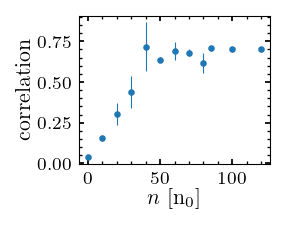

In [92]:
plt.errorbar(data['conc'], data['order_avg'], yerr=data['order_std'],
                ls='', marker='o', markersize=2, mew=1, lw=0.5)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('correlation')

**Comment:** the increase of order parameter at low concentration can be used to explain the $\alpha$ increase at low concentration? Let's do local correlation between order and fluctuation.

### 2.3 Local correlation between order and fluctuation

#### 2.3.1 One frame correlation

In [98]:
piv_folder = r'D:\density_fluctuations\08032020\piv_imseq\00'
pivData = pd.read_csv(os.path.join(piv_folder, '3000-3001.csv'))

In [99]:
order = order_field(pivData)

In [102]:
df = np.load(r'D:\density_fluctuations\08032020\local_df\00\dt=10\3000.npy')
corr2d(order, df)

0.05468329062966951

#### 2.3.2 Multiple frames

In [103]:
n = 0
df_folder = r'D:\density_fluctuations\08032020\local_df\{:02d}\dt=10'.format(n)
l = readdata(df_folder, 'npy')
l_crop = l.loc[l.Name.astype('int')>l.Name.astype('int')*0.9]

In [104]:
corr_list = []
for num, i in l_crop.iterrows():
    f = int(i.Name)
    df = np.load(i.Dir)
    pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(f, f+1)))
    order = order_field(pivData)
    corr = corr2d(order, df)
    corr_list.append(corr)

-0.03448589183315986
0.06508305823588612
0.03954383050016898
-0.012755155765094357
0.03030128066495111
-0.005022461538122561
0.009636420701155977
-0.010358129422081152
0.027103511510603726
0.06900110496428759
0.027716810109461885
0.005164401589979232
-0.02751283057106201
0.021795910889732126
0.036965131621517544
0.060108897466714016
0.0311193657147763
0.01881019098614233
-0.013271845562030168
0.05792427895860196
0.021032749320115552
-0.022126507472505053
-0.00900855863276523
0.011841081105549274
-0.03634679603508028
-0.022457357558294443
0.0391328989121023
-0.00018468836593016358
-0.01221679293016098
0.003988121537382846
0.005696240294923161
0.03650754786550233
0.016045111110845407
-0.038231621733632204
0.02745454541607809
0.015160766035512602
-0.0570609751658589
-0.029530217134944813
-0.015448385671902225
-0.06302809202575661
-0.03717394832807388
0.02302148084207574
-0.00800539576793448
0.013237725985428356
0.04584650646094478
0.06537845939347438
0.007507733275645723
0.018048798138305

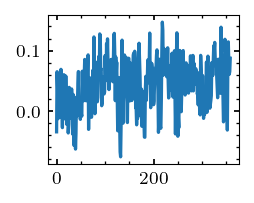

In [105]:
plt.plot(corr_list)

In [106]:
np.array(corr_list).mean()

0.044576342280529424

In [107]:
def order_df_correlation(df_folder, piv_folder, after=0.9):
    """
    Compute the local correlation between local density fluctuations and local flow order.
    
    Args:
    df_folder -- local density fluctuations data folder
    piv_folder -- piv data folder
    after -- only process data after certain percentage, when 0, process all data and when 1, process only the last data.
                Default is 0.9.
    
    Returns:
    corr_list -- an array of correlations at different frames
    """
    
    l = readdata(df_folder, 'npy')
    l_crop = l.loc[l.Name.astype('int')>l.Name.astype('int')*0.9]
    corr_list = []
    for num, i in l_crop.iterrows():
        f = int(i.Name)
        df = np.load(i.Dir)
        pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(f, f+1)))
        order = order_field(pivData)
        corr = corr2d(order, df)
        corr_list.append(corr)
    
    return np.array(corr_list)

In [109]:
order = order_df_correlation(df_folder, piv_folder)

#### 2.3.3 Multiple videos

In [112]:
folder = r'D:\density_fluctuations\08032020\local_df'
sfL = next(os.walk(folder))[1]
corr_list = []
for sf in sfL:
    df_folder = os.path.join(folder, sf, 'dt=10')
    piv_folder = r'D:\density_fluctuations\08032020\piv_imseq\{}'.format(sf)
    corr = order_df_correlation(df_folder, piv_folder)
    corr_list.append(corr.mean())

In [114]:
corr_list

[0.044576342280529424,
 0.04139434300714307,
 0.029839219272416978,
 0.034999868994945546,
 0.05187642309174348,
 0.04728575612373624,
 0.037564256147555236,
 0.05473049390870529,
 0.05333552738352719,
 0.006306700790230181,
 0.01568100817394825,
 0.009532549680268657,
 0.007158949047647931,
 -0.00609247485232311,
 -0.003175327604850616]

**Comment:** this set of local correlation shows that flow order is more correlated with local fluctuation at high concentration, similar to energy. So this is not an evidence for correlation between order and ldf at low concentration.

## 3 Distribution of $\nabla c$